In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
#from keras.datasets import mnist
#from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import LearningRateScheduler
#load mnist dataset
 #everytime loading data won't be so easy :)

Using TensorFlow backend.


In [2]:
'''
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# PREPARE DATA FOR NEURAL NETWORK
Y_train_kaggle = train["label"]
X_train_kaggle = train.drop(labels = ["label"],axis = 1)
X_train_kaggle = X_train_kaggle.values.reshape(-1,28,28,1)
X_test_kaggle =  test/ 255.0
X_test_kaggle = test.values.reshape(-1,28,28,1)
Y_train_kaggle = to_categorical(Y_train_kaggle, num_classes = 10)
print(X_train_kaggle.shape)
print(Y_train_kaggle.shape)
print(X_test_kaggle.shape)
#print(testing_labels.shape)


#print(np.shape(X_train))
#print(np.shape(y_train))
#print(np.shape(X_test))
#print(np.shape(y_test))
'''

(42000, 28, 28, 1)
(42000, 10)
(28000, 28, 28, 1)


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

train_datagen = ImageDataGenerator(rescale = 1./255. )
validation_datagen = ImageDataGenerator(rescale=1. / 255.)
Y_train = to_categorical(Y_train, num_classes = 10)
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
#print(np.shape(Y_test))

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)


In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_test_kaggle[i].reshape((28,28)), cmap='gray', interpolation='none')
  #plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_test_kaggle[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# Set up different models varies in poolings

## 32 64 128 256 512 1024 2048 4096

## 2 4 8 16 32

In [10]:
nets = 14
model = [0] *nets

for i in range(nets):
    model[i] = tf.keras.models.Sequential()
    model[i].add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model[i].add(tf.keras.layers.BatchNormalization()) 
    model[i].add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model[i].add(tf.keras.layers.BatchNormalization())
    model[i].add(tf.keras.layers.Conv2D(32, (5, 5),strides=2,padding='same', activation='relu'))
    model[i].add(tf.keras.layers.BatchNormalization())
    model[i].add(tf.keras.layers.Dropout(0.4))
    
    model[i].add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model[i].add(tf.keras.layers.BatchNormalization())
    model[i].add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model[i].add(tf.keras.layers.BatchNormalization())
    model[i].add(tf.keras.layers.Conv2D(64, (5, 5),strides=2,padding='same', activation='relu'))
    model[i].add(tf.keras.layers.BatchNormalization())
    model[i].add(tf.keras.layers.Dropout(0.4))    
    
    model[i].add(tf.keras.layers.Flatten())
    model[i].add(tf.keras.layers.Dense(2**(i+1), activation=tf.nn.relu))
    model[i].add(tf.keras.layers.BatchNormalization())
    model[i].add(tf.keras.layers.Dropout(0.4))
    model[i].add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model[i].compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
epochs = 20
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x+epochs))
# Split validation set
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# Training
history = [0] * nets
names = ["2N","4N","8N","16N","32N","64N","128N","256N","512N","1024N","2048N","4096N","8192N","16384N","32768N"]

for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 2N: Epochs=20, Train accuracy=0.49848, Validation accuracy=0.98273
CNN 4N: Epochs=20, Train accuracy=0.69645, Validation accuracy=0.99234
CNN 8N: Epochs=20, Train accuracy=0.93043, Validation accuracy=0.99429
CNN 16N: Epochs=20, Train accuracy=0.99193, Validation accuracy=0.99384
CNN 32N: Epochs=20, Train accuracy=0.99520, Validation accuracy=0.99424
CNN 64N: Epochs=20, Train accuracy=0.99585, Validation accuracy=0.99394
CNN 128N: Epochs=20, Train accuracy=0.99658, Validation accuracy=0.99399
CNN 256N: Epochs=20, Train accuracy=0.99630, Validation accuracy=0.99454
CNN 512N: Epochs=20, Train accuracy=0.99680, Validation accuracy=0.99369
CNN 1024N: Epochs=20, Train accuracy=0.99685, Validation accuracy=0.99379
CNN 2048N: Epochs=20, Train accuracy=0.99675, Validation accuracy=0.99369
CNN 4096N: Epochs=20, Train accuracy=0.99620, Validation accuracy=0.99349
CNN 8192N: Epochs=20, Train accuracy=0.99695, Validation accuracy=0.99289
CNN 16384N: Epochs=20, Train accuracy=0.99505, Validatio

In [12]:
from keras.models import load_model
for j in range(nets):
    modelname = 'model'+str(j)+'16384_mnist_02'+'.h5'
    print(modelname+' saved')
    model[j].save(modelname)  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model


model016384_mnist_02.h5 saved
model116384_mnist_02.h5 saved
model216384_mnist_02.h5 saved
model316384_mnist_02.h5 saved
model416384_mnist_02.h5 saved
model516384_mnist_02.h5 saved
model616384_mnist_02.h5 saved
model716384_mnist_02.h5 saved
model816384_mnist_02.h5 saved
model916384_mnist_02.h5 saved
model1016384_mnist_02.h5 saved
model1116384_mnist_02.h5 saved
model1216384_mnist_02.h5 saved
model1316384_mnist_02.h5 saved


In [19]:
history[0].history['acc'][-1]
hi

[0.46371815, 0.74170417, 0.92848575, 0.99150425, 0.9953773]

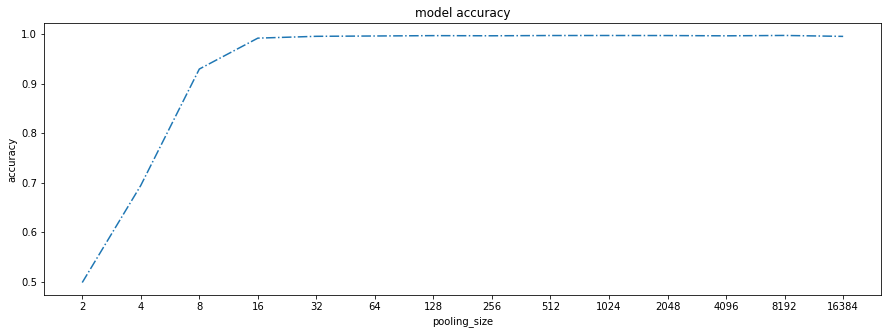

In [14]:
# PLOT ACCURACIES
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
pooling_size = ['2','4','8','16','32','64','128','256','512','1024','2048','4096','8192','16384']

plt.figure(figsize=(15,5))
#for i in range(nets):
hi = [history[0].history['acc'][-1],history[1].history['acc'][-1],history[2].history['acc'][-1],history[3].history['acc'][-1],history[4].history['acc'][-1],history[5].history['acc'][-1],history[6].history['acc'][-1],history[7].history['acc'][-1],history[8].history['acc'][-1],history[9].history['acc'][-1],history[10].history['acc'][-1],history[11].history['acc'][-1],history[12].history['acc'][-1],history[13].history['acc'][-1]]
plt.plot(pooling_size,hi,linestyle=styles[1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('pooling_size')
#plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])
plt.show()

In [6]:
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5, 5),strides=2,padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),   
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5, 5),strides=2,padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),   
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),   
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

'''

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
'''
epochs = 30
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x+epochs))
history = model.fit_generator(train_datagen.flow(X_train_kaggle, Y_train_kaggle, batch_size=64),
                              steps_per_epoch=(X_train.shape[0]) / 64,
                              epochs=epochs,
                              callbacks=[annealer])
'''

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
657/657 [==============================] - 10s 15ms/step - loss: 0.5943 - acc: 0.8166
Epoch 2/30
657/657 [==============================] - 8s 12ms/step - loss: 0.1445 - acc: 0.9569
Epoch 3/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0907 - acc: 0.9717
Epoch 4/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0722 - acc: 0.9781
Epoch 5/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0601 - acc: 0.9820
Epoch 6/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0503 - acc: 0.9847
Epoch 7/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0429 - acc: 0.9866
Epoch 8/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0407 - acc: 0.9876
Epoch 9/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0366 - acc: 0.9889
Epoch 10/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0345 - ac

In [ ]:
model.evaluate_generator(validation_datagen.flow(X_test_kaggle,  Y_test_kaggle))

In [ ]:
# KAGGLE
results = model.predict_generator(validation_datagen.flow(X_test_kaggle))
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("MNIST-CNN.csv",index=False)
print(results)